In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pydataset import data

# import splitting functions
from sklearn.model_selection import train_test_split

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire and env modules
import acquire as acq
import env

Load In successful, awaiting commands...
Load In successful, awaiting commands...


> # Data Acquisition

# IRIS

In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df_iris.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# GOOGLE SHEET

In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

df_google = pd.read_csv(csv_export_url)
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_google.shape

(891, 12)

In [10]:
df_google.columns.to_list() # used for large files where we can just copy and paste the output
# to edit!

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
for col in df_google.columns:
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [14]:
df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# EXCEL

In [15]:
df_excel = pd.read_excel("train.xlsx", header=0)

In [16]:
df_excel_sample = df_excel.head(101)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [17]:
df_excel.shape[0]

891

In [18]:
df_excel.columns[0:5].to_list()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

In [19]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_excel.select_dtypes(include='object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
# to get this into a df and then exclude the objects to get only numbers
df_excel.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [22]:
df_excel.select_dtypes(include='number').columns.to_list()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [23]:
titanic_stats = df_excel[['Age', 'Fare']].describe()
titanic_stats

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [24]:
titanic_stats['Age'].max()-titanic_stats['Age'].min()

713.58

In [25]:
# WRONG
col_ranges = (round(df_excel.describe().max() - df_excel.describe().min(),2))
col_ranges

PassengerId    890.00
Survived       891.00
Pclass         890.16
Age            713.58
SibSp          891.00
Parch          891.00
Fare           891.00
dtype: float64

# ACQUIRE.PY

## Titanic

In [26]:
acq.get_titanic_data()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


## Iris

In [27]:
acq.get_iris_data()

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


## Telco_Churn

In [28]:
acq.get_telco_churn()

csv file found and loaded


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


> # Data Preparation

## IRIS

Use the function defined in acquire.py to load the iris data.

In [29]:
iris_df = acq.get_iris_data()
iris_df

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


Drop the species_id and measurement_id columns.

In [30]:
iris_df = iris_df.drop(['species_id', 'measurement_id'], axis=1)

In [31]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Rename the species_name column to just species.

In [32]:
iris_df.rename({'species_name':'species'}, axis=1, inplace=True)

In [33]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [34]:
dummy_iris = pd.get_dummies(iris_df.species, drop_first=True)

In [35]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [36]:
# delete CSV before proceeding

iris_df = acq.get_iris_data()
iris_df

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [37]:
clean_iris_df = acq.clean_iris(iris_df)
clean_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


## TITANIC

Use the function defined in acquire.py to load the Titanic data.

In [38]:
titanic_df = acq.get_titanic_data()

csv file found and loaded


In [39]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Drop any unnecessary, unhelpful, or duplicated columns.



In [40]:
titanic_df.drop(columns={'age', 'deck', 'embarked', 'class'}, axis=1, inplace=True)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [41]:
titanic_df.embark_town = titanic_df.embark_town.fillna(value='Southampton')

In [42]:
titanic_df.head().isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [43]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first=True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [44]:
t_df = pd.concat([titanic_df,dummy_df], axis=1)

In [45]:
t_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [46]:
# delete CSV before proceeding

raw_df = acq.get_titanic_data()
raw_df.head()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [47]:
clean_titanic_df = acq.prep_titanic(raw_df)

In [48]:
clean_titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


## TELCO_CHURN

Use the function defined in acquire.py to load the Telco data.



In [49]:
# telco_df = acq.get_telco_churn()

In [50]:
# telco_df.head()

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [51]:
# telco_df = telco_df.drop(columns=['contract_type_id','internet_service_type_id','payment_type_id']) # keeping cust_id

In [52]:
# telco_df.info()

In [53]:
# telco_df.columns.to_list()

Gender Complete

In [54]:
# telco_df.gender = pd.get_dummies(telco_df[['gender']], drop_first=True)

In [55]:
# telco_df.gender.value_counts()

Partner Complete

In [56]:
# telco_df.partner = telco_df.partner.replace('Yes',1).replace('No',0)

In [57]:
# telco_df.partner.value_counts()

Dependents Complete

In [58]:
# telco_df.dependents = telco_df.dependents.replace('Yes',1).replace('No',0)

In [59]:
# telco_df.dependents.value_counts()

Phone Service Complete

In [60]:
# telco_df.phone_service = telco_df.phone_service.replace('Yes',1).replace('No',0)

In [61]:
# telco_df.phone_service.value_counts()

Online Security Complete

In [62]:
# telco_df.online_security = telco_df.online_security.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [63]:
# telco_df.online_security.value_counts()

Online Backup Complete

In [64]:
# telco_df.online_backup = telco_df.online_backup.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [65]:
# telco_df.online_backup.value_counts()

Device Protection Complete

In [66]:
# telco_df.device_protection = telco_df.device_protection.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [67]:
# telco_df.device_protection.value_counts()

Tech Support Complete

In [68]:
# telco_df.tech_support = telco_df.tech_support.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [69]:
# telco_df.tech_support.value_counts()

Streaming TV Complete

In [70]:
# telco_df.streaming_tv = telco_df.streaming_tv.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [71]:
# telco_df.streaming_tv.value_counts()

Streaming Movies Complete

In [72]:
# telco_df.streaming_movies = telco_df.streaming_movies.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [73]:
# telco_df.streaming_movies.value_counts()

Paperless Billing Complete

In [74]:
# telco_df.paperless_billing = telco_df.paperless_billing.replace('Yes',1).replace('No',0)

In [75]:
# telco_df.paperless_billing.value_counts()

Churn Complete

In [76]:
# telco_df.churn = telco_df.churn.replace('Yes',1).replace('No',0)

In [77]:
# telco_df.churn.value_counts()

Total Charges Complete

In [78]:
# telco_df.total_charges = pd.to_numeric(telco_df['total_charges'], errors='coerce')

In [79]:
# telco_df.total_charges.info()

Multiple Lines Complete

In [80]:
# telco_df.multiple_lines = telco_df.multiple_lines.replace('No phone service',0)\
# .replace('Yes',1).replace('No',0)

In [81]:
# telco_df.multiple_lines.value_counts()

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

## MAPPING AND DUMMIES!

In [ ]:
# USE MAPPING FUNCTION!! For binary values, use pd.get_dummies for non-binary columns

# telco['gender_encoded'] telco.gender.map({'Female':1, 'Male':0})

# Made new columns to not overwrite the explicitly stated strings

Contract Type, Internet Service Type, Payment Type Complete

In [82]:
# telco_df

In [83]:
# telco_dummy_df = pd.get_dummies(telco_df[['contract_type','payment_type','internet_service_type']], dummy_na=False, drop_first=[True, True, True])
# telco_dummy_df.head()

In [84]:
# telco_df

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



In [85]:
# delete CSV before proceeding

raw_telco = acq.get_telco_churn()

csv file found and loaded


In [86]:
clean_telco_df = acq.clean_telco(raw_telco)
clean_telco_df1 = clean_telco_df

## SPLITTING

In [88]:
# Train = 60%
# Validate and Test = 20%/20%

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [89]:
split_test_df = clean_telco_df1

In [90]:
train, test = train_test_split(split_test_df, test_size=.2, random_state=123, stratify=split_test_df.churn)

In [91]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)

In [92]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 24)
validate -> (1691, 24)
test -> (1409, 24)


In [93]:
split_test_df.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,churn,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2283.300441,0.265370,0.209144,0.240664,0.216101,0.335794,0.228880,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.771362,0.441561,0.406726,0.427517,0.411613,0.472301,0.420141,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3794.737500,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


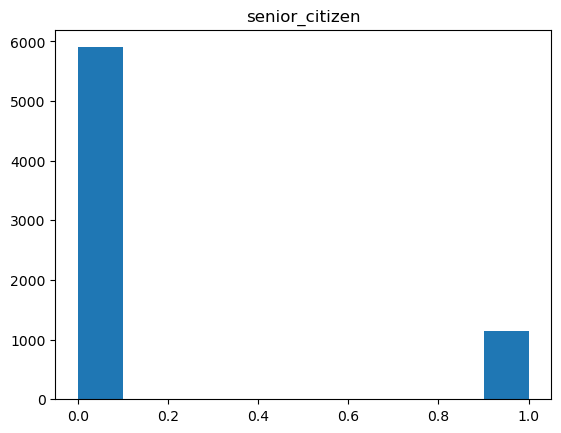

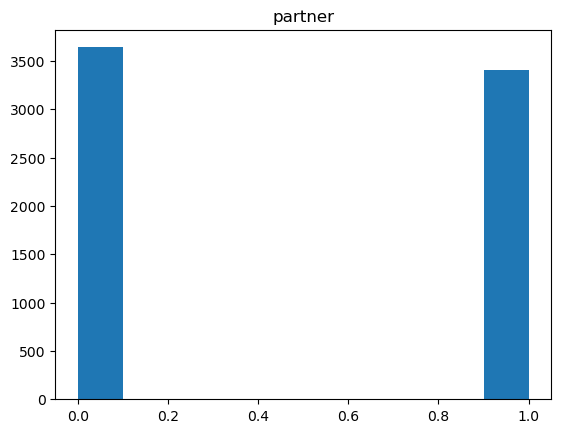

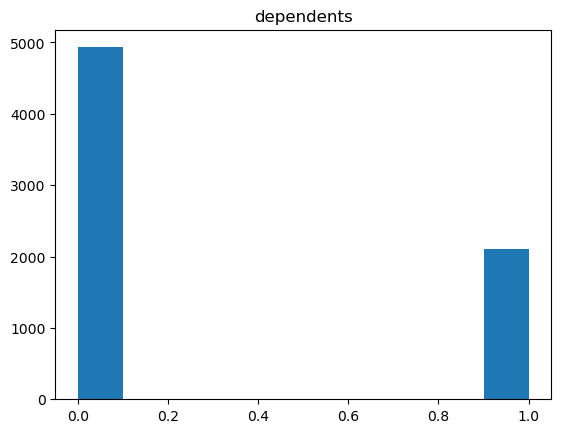

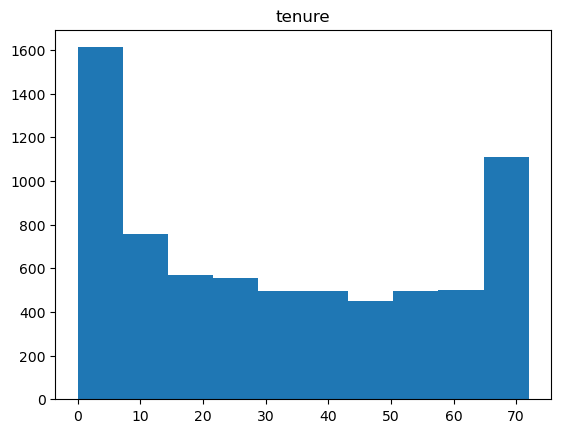

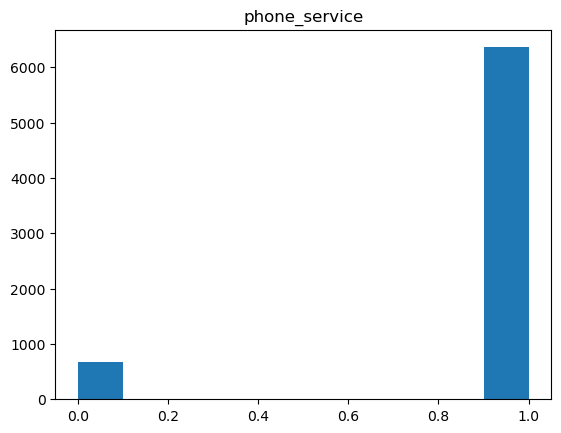

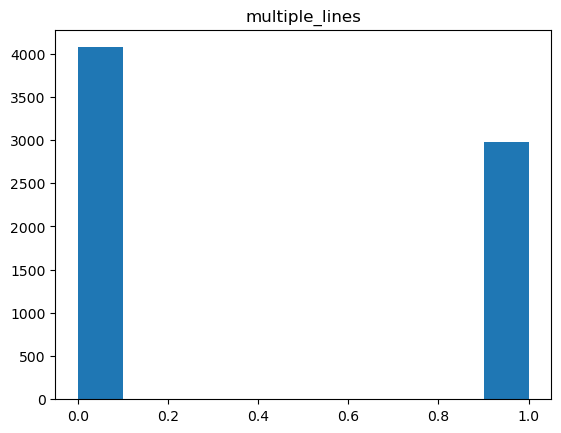

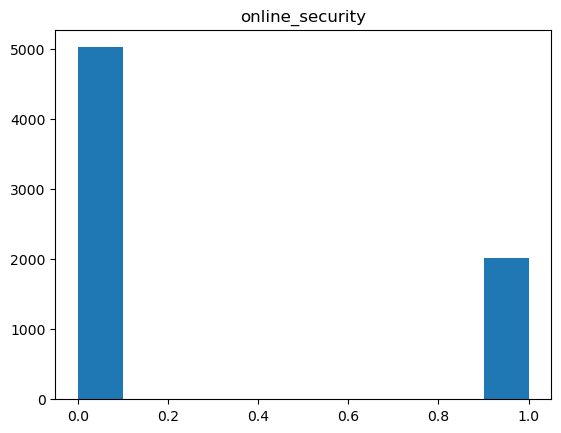

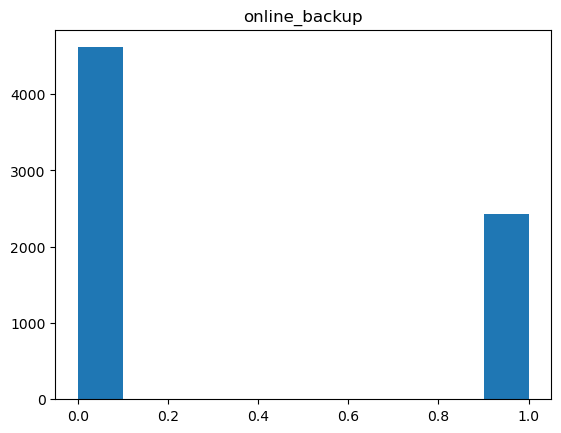

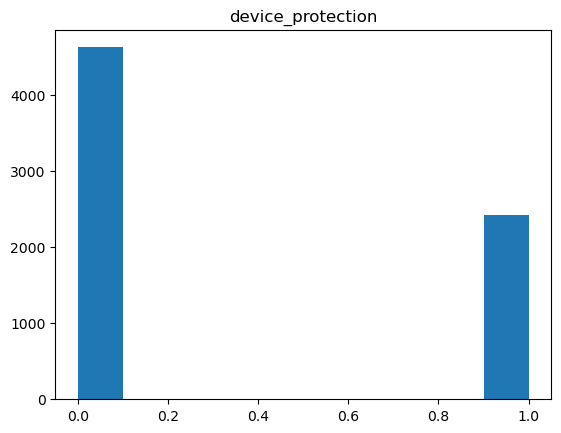

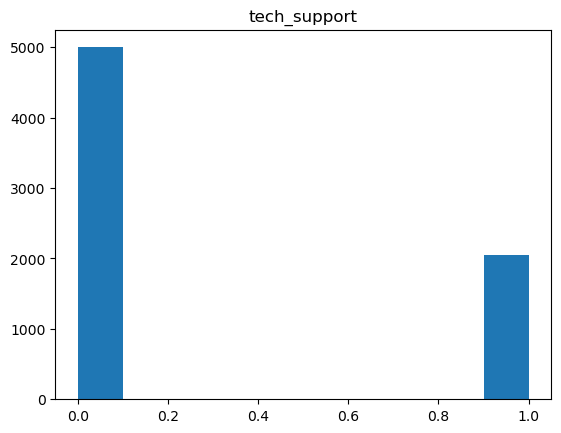

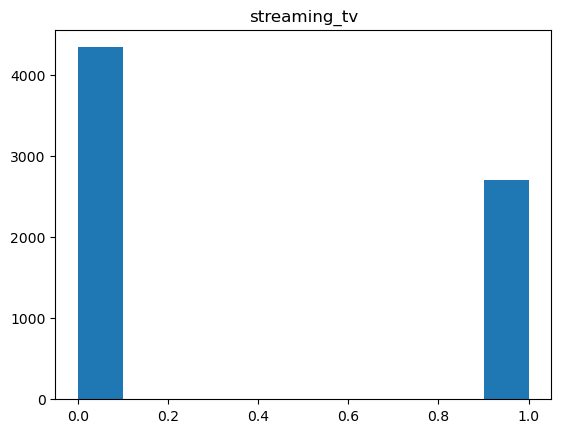

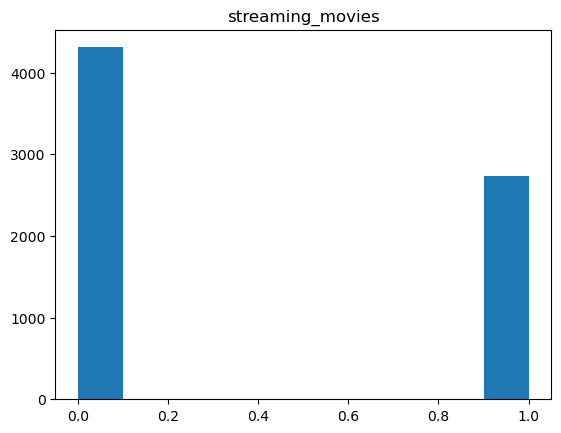

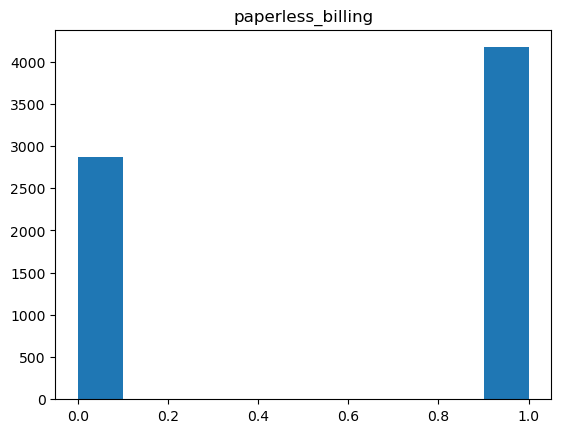

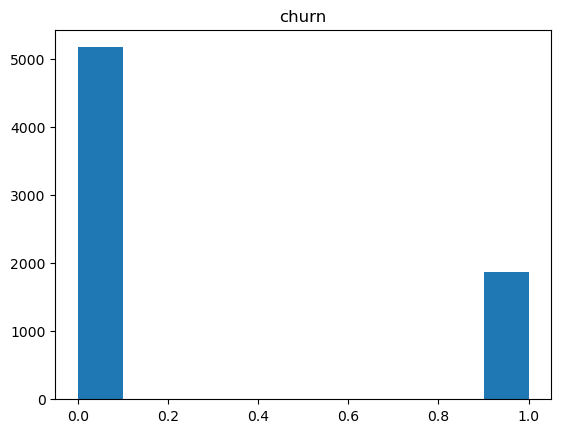

In [94]:
num_cols = split_test_df.columns[[split_test_df[col].dtype == 'int64' for col in split_test_df.columns]]
for col in num_cols:
    plt.hist(split_test_df[col])
    plt.title(col)
    plt.show()

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.



In [95]:
train_iris, validate_iris, test_iris = acq.split_iris(clean_iris_df)

In [96]:
print(f'Prepared df: {clean_iris_df.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 8)

Train: (84, 8)
Test: (30, 8)


In [97]:
len(train_iris) / len(clean_iris_df)

0.56

In [98]:
len(test_iris) / len(clean_iris_df)

0.2

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [99]:
train_titanic, validate_titanic, test_titanic = acq.split_titanic(clean_titanic_df)

In [100]:
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanict.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [101]:
# train, test = train_test_split(clean_titanic_df, #dataframe
#                 random_state=123, #setting my random seed
#                 test_size=0.20, #setting the size of my test df
#                  stratify=clean_titanic_df.survived) #stratifying on my target variabl

In [102]:
# print(f'Prepared df: {clean_titanic_df.shape}')
# print()
# print(f'Train: {train.shape}')
# print(f'Test: {test.shape}')

In [103]:
len(train_titanic) / len(clean_titanic_df)

0.5993265993265994

In [104]:
len(test_titanic) / len(clean_titanic_df)

0.20089786756453423

In [105]:
# train, validate = train_test_split(train, 
#                 random_state=123,
#                  test_size=.25,
#                  stratify= train.survived
#                 )

In [106]:
print(f'Prepared df: {clean_titanic_df.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [107]:
train_telco, validate_telco, test_telco = acq.split_telco(clean_telco_df)

In [108]:
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Train: (4225, 24)
Validate: (1409, 24)
Test: (1409, 24)


In [109]:
len(train_telco) / len(clean_telco_df)

0.5998864120403238

In [110]:
len(test_telco) / len(clean_telco_df)

0.20005679397983814

In [111]:
print(f'Prepared df: {clean_telco_df.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 24)

Train: (4225, 24)
Validate: (1409, 24)
Test: (1409, 24)
